In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

In [4]:
import tensorflow as tf
from tensorflow import keras 
## check nvidia driver

In [5]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [6]:
tf.test.is_gpu_available(), tf.test.is_built_with_cuda(), tf.test.is_built_with_gpu_support(), tf.test.is_built_with_rocm()

(False, False, False, False)

In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [8]:
X_train, X_val = X_train_full[:50000]/225.0, X_train_full[50000:]/225.0
y_train, y_val = y_train_full[:50000], y_train_full[50000:]
X_train.shape, y_train.shape,  y_val.shape, y_test.shape

((50000, 28, 28), (50000,), (10000,), (10000,))

In [9]:
unique, counts = np.unique(y_train, return_counts=True)
unique, counts

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([4977, 5012, 4992, 4979, 4950, 5004, 5030, 5045, 5032, 4979]))

In [10]:
class_names = ['T_shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot']
print(class_names[0])

T_shirt


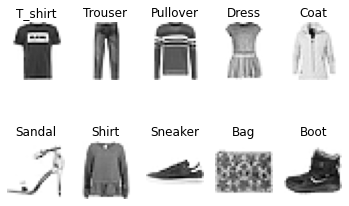

In [11]:
fig, axs = plt.subplots(2, 5)
for num in range(10):
    i = np.argwhere(y_train == num)[0]
    sample = X_train[i].reshape(28, 28)
    c, r = num//5, num%5
    axs[c, r].imshow(sample, cmap='Greys')
    axs[c, r].set_title(class_names[num])
    axs[c, r].axis('off')
## lst.index(), arr.argwhere()

In [12]:
## build the network with two hidden layers 
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'), 
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(X_train, y_train, epochs=10,
                   validation_data=(X_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 21s 417us/sample - loss: 0.7040 - accuracy: 0.7670 - val_loss: 0.5310 - val_accuracy: 0.8171
Epoch 2/10
50000/50000 [==============================] - 14s 282us/sample - loss: 0.4840 - accuracy: 0.8321 - val_loss: 0.4822 - val_accuracy: 0.8274
Epoch 3/10
50000/50000 [==============================] - 13s 256us/sample - loss: 0.4386 - accuracy: 0.8478 - val_loss: 0.4425 - val_accuracy: 0.8430
Epoch 4/10
50000/50000 [==============================] - 16s 313us/sample - loss: 0.4123 - accuracy: 0.8552 - val_loss: 0.4318 - val_accuracy: 0.8464
Epoch 5/10
50000/50000 [==============================] - 12s 244us/sample - loss: 0.3918 - accuracy: 0.8631 - val_loss: 0.3965 - val_accuracy: 0.8618
Epoch 6/10
50000/50000 [==============================] - 14s 277us/sample - loss: 0.3756 - accuracy: 0.8678 - val_loss: 0.3938 - val_accuracy: 0.8588
Epoch 7/10
50000/50000 [====================

In [16]:
history_dataframe = pd.DataFrame(history.history)

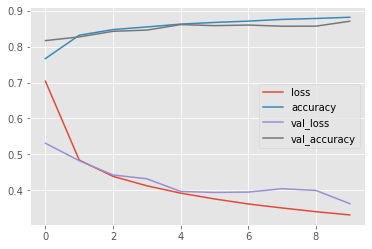

In [19]:
history_dataframe.plot()
plt.show()

## Tensorboard

In [20]:
import os
import time 
root_logdir = os.path.join(os.curdir, 'my_logs')
def get_run_logdir():
    run_id = time.strftime('run_%y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()

In [21]:
root_logdir, run_logdir

('./my_logs', './my_logs/run_20_09_16-19_43_05')

In [22]:
tensorboard_cb = keras.callbacks.TensorBoard(root_logdir)
history = model.fit(X_train, y_train, epochs=5,
                   validation_data=(X_val, y_val), 
                    callbacks=[tensorboard_cb])

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 12s 234us/sample - loss: 0.3209 - accuracy: 0.8851 - val_loss: 0.3948 - val_accuracy: 0.8596
Epoch 2/5
50000/50000 [==============================] - 9s 189us/sample - loss: 0.3130 - accuracy: 0.8878 - val_loss: 0.3429 - val_accuracy: 0.8796
Epoch 3/5
50000/50000 [==============================] - 10s 207us/sample - loss: 0.3063 - accuracy: 0.8906 - val_loss: 0.3781 - val_accuracy: 0.8639
Epoch 4/5
50000/50000 [==============================] - 9s 189us/sample - loss: 0.2989 - accuracy: 0.8927 - val_loss: 0.4004 - val_accuracy: 0.8599
Epoch 5/5
50000/50000 [==============================] - 11s 226us/sample - loss: 0.2921 - accuracy: 0.8946 - val_loss: 0.3737 - val_accuracy: 0.8666


In [30]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.

In [37]:
A = tf.Variable([1])